Create an autoencoder model using the MNIST dataset

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Input, Dense


In [10]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.4.1


In [11]:
(X_train,_),(X_test,_) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [14]:
# n.prod multiply 28 x 28 = 784
X_train = X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))
X_train.shape

(60000, 784)

In [15]:
# 784 input, 32 redution , 784 output
factor_compact = 784/32
autoencoder = Sequential()
# dense hide layer using relu
autoencoder.add(Dense(32,activation='relu',input_shape=(784,)))
autoencoder.add(Dense(784,activation='sigmoid'))
autoencoder.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

# Explaining the calculations
Dense 1 = 784 neurons * 32 neurons = 25088 + 32 BIAS = 25120

Dense 2 = 32 neurons in Hide layers * 784 neurons in the output layer = 25088 + 784 BIAS = 25.872

In [16]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',
                    metrics=['accuracy'])
# the double x_train in the parameter for check input = output for autoencoders (self supervised learning)
autoencoder.fit(X_train,X_train,epochs=50,batch_size=256,
                shuffle=True,validation_data=(X_test,X_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0097 - loss: 0.3862 - val_accuracy: 0.0119 - val_loss: 0.1889
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0109 - loss: 0.1789 - val_accuracy: 0.0108 - val_loss: 0.1528
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.0110 - loss: 0.1483 - val_accuracy: 0.0106 - val_loss: 0.1326
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0104 - loss: 0.1309 - val_accuracy: 0.0091 - val_loss: 0.1201
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0103 - loss: 0.1193 - val_accuracy: 0.0118 - val_loss: 0.1117
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0105 - loss: 0.1117 - val_accuracy: 0.0122 - val_loss: 0.1059
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0112 - loss: 0.1062 - val_accuracy: 0.0119 - val_loss: 0.1016
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.0114 - loss: 0.1023 - val_accur

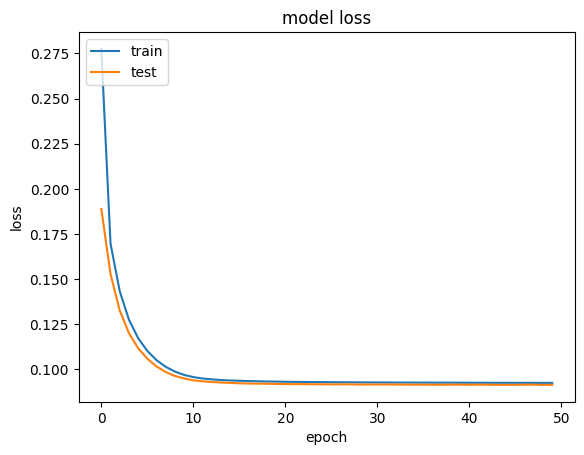

In [17]:
# prompt: create a graph to compare loss e val_loss in the time

import matplotlib.pyplot as plt
plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [22]:
# maybe using stop early it is fastest
early = keras.callbacks.EarlyStopping(monitor='loss',
                                         patience=2,
                                         min_delta=0.001,
                                         mode='auto',
                                         restore_best_weights=True
                                         )
autoencoder.fit(X_train,X_train,epochs=50,batch_size=256,
                shuffle=True,validation_data=(X_test,X_test),callbacks=[early])

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0123 - loss: 0.0925 - val_accuracy: 0.0132 - val_loss: 0.0915
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0120 - loss: 0.0926 - val_accuracy: 0.0128 - val_loss: 0.0915
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0121 - loss: 0.0925 - val_accuracy: 0.0147 - val_loss: 0.0914


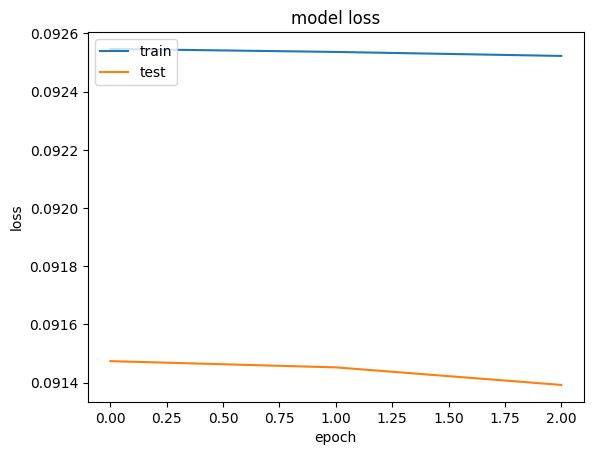

In [23]:
import matplotlib.pyplot as plt
plt.plot(autoencoder.history.history['loss'])
plt.plot(autoencoder.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [24]:
origin_dim = Input(shape=(784,))
layer_encoder = autoencoder.layers[0]
encoder = Model(origin_dim,layer_encoder(origin_dim))
encoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
encoder_img = encoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [30]:
#784 -> 32
encoder_img.shape

(10000, 32)

In [31]:
# 32 --> 784
decoder_img = autoencoder.predict(X_test)
decoder_img.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 784)

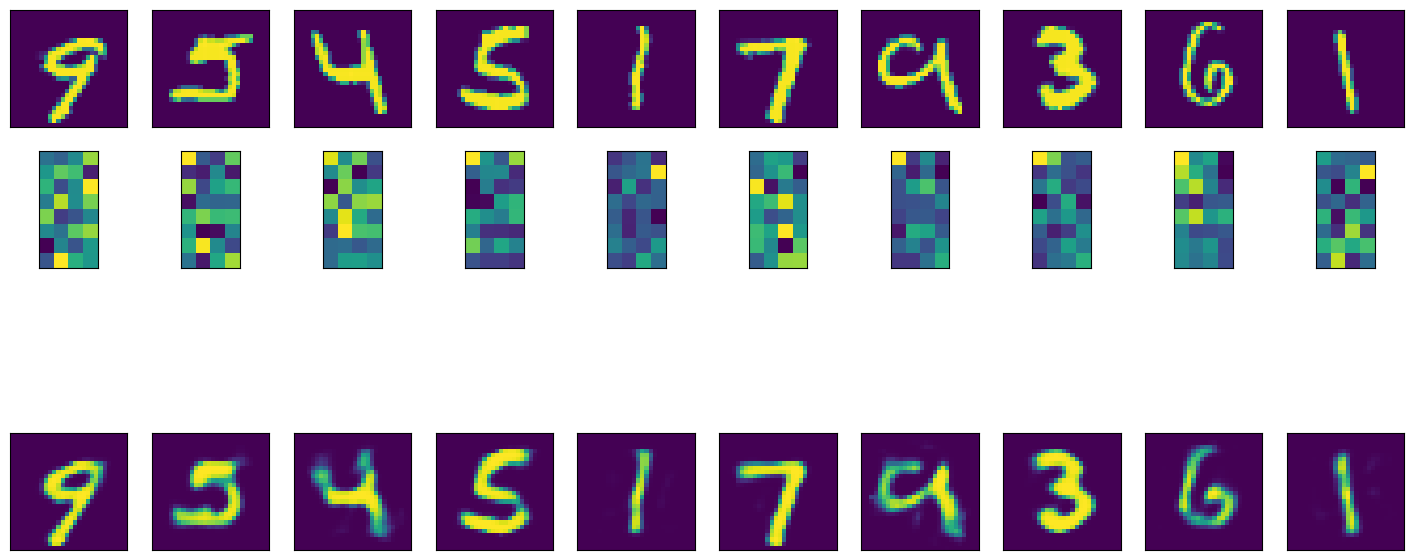

In [42]:
# random 10 images
img_test = np.random.randint(X_test.shape[0], size = 10)
plt.figure(figsize=(18,18))
for i, index in enumerate(img_test):
    # original
    ax = plt.subplot(10,10,i+1)
    plt.imshow(X_test[img_test[i]].reshape(28,28))
    plt.xticks([])
    plt.yticks([])
    # encode image
    ax = plt.subplot(10,10,i+11)
    plt.imshow(encoder_img[index].reshape(8,4))
    plt.xticks([])
    plt.yticks([])
    # decode image
    ax = plt.subplot(10,10,i+1+10*3)
    plt.imshow(decoder_img[index].reshape(28,28))
    plt.xticks([])
    plt.yticks([])
plt.show()